In [1]:
OPENSLIDE_PATH = r'D:\DigiPathAI\openslide-win64-20221217\bin'

import os
if hasattr(os, 'add_dll_directory'):
    # Python >= 3.8 on Windows
    with os.add_dll_directory(OPENSLIDE_PATH):
        import openslide
else:
    import openslide

In [2]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [3]:
img_path=r'D:\Python Code\normal_001.tif'

osr = openslide.OpenSlide(img_path)

properties = osr.properties

print("Vendor is:", properties['openslide.vendor'])
print("Pixel Size of X in um is: ", properties['openslide.mpp-x'])
print("Pixel Size of Y in um is: ", properties['openslide.mpp-y'])

dimensions = osr.dimensions
print(osr.dimensions)

Vendor is: philips
Pixel Size of X in um is:  0.24309399999999998
Pixel Size of Y in um is:  0.24309399999999998
(97792, 221184)


In [8]:
slide = np.asarray(osr)

plt.figure(figsize=(8,8))
plt.imshow(slide.astype(float))

TypeError: float() argument must be a string or a real number, not 'OpenSlide'

<Figure size 800x800 with 0 Axes>

In [11]:
slide = np.array(osr)

In [12]:
slide.shape

()

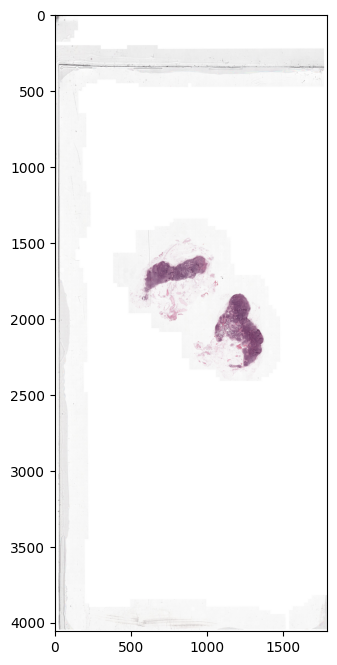

In [15]:
slide_thumb_600_np = osr.get_thumbnail(size = (4056, 4056))
slide_thumb_600_np.show()

slide_thumb_600_np = np.array(slide_thumb_600_np);

plt.figure(figsize=(8,8))
plt.imshow(slide_thumb_600_np)

In [5]:
dims = osr.level_dimensions

num_levels = len(dims)
print("Number of levels: %i", num_levels)

print("Dimensions of various level are: ", dims)

Number of levels: %i 10
Dimensions of various level are:  ((97792, 221184), (48896, 110592), (24448, 55296), (12224, 27648), (6112, 13824), (3056, 6912), (1528, 3456), (764, 1728), (382, 864), (191, 432))


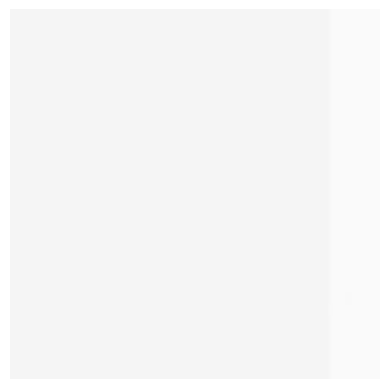

In [12]:
# Extracting 1024*1024 from centre somewhere in (16000, 16000) region
smaller_region = osr.read_region((2500, 1500), 0, (256, 256))
smaller_region_RGB = smaller_region.convert('RGB')
smaller_region_np = np.array(smaller_region_RGB)

plt.axis('off')
plt.imshow(smaller_region_np)